# Imports 

In [11]:


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score , mean_absolute_error


# Dataset

In [13]:
salary_dataset = pd.read_csv('Salary_dataset.csv',index_col = 'Unnamed: 0' )

In [14]:
salary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [15]:
salary_dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


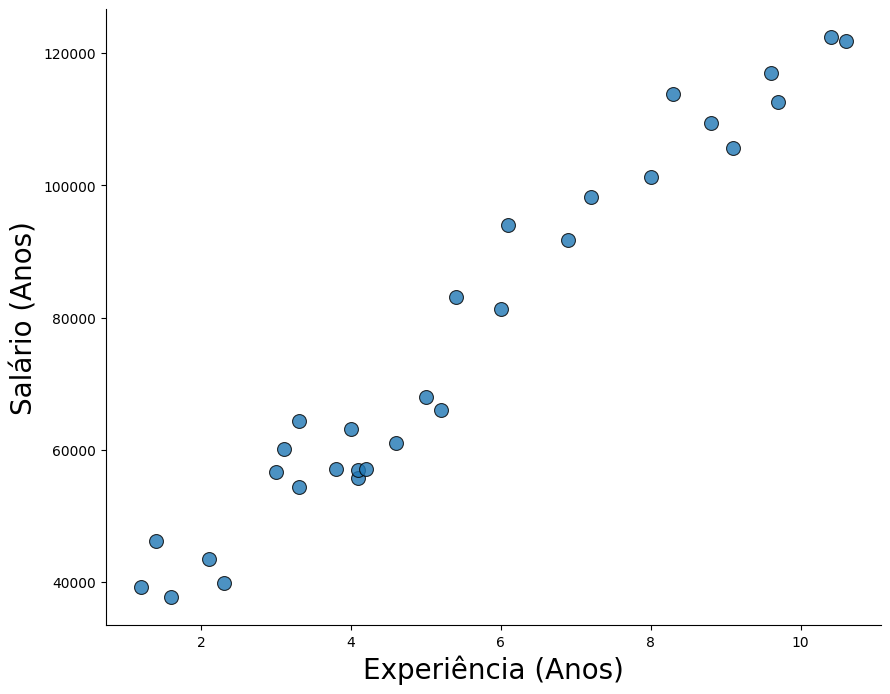

In [3]:
f, ax = plt.subplots(nrows=1 , ncols=1, figsize = (10,8))

sns.scatterplot(data= salary_dataset , x= salary_dataset['YearsExperience'] , y=salary_dataset['Salary'],  s=100, alpha = 0.8 ,edgecolor = 'k' ,ax = ax )
ax.set_ylabel('Salário (Anos)' , fontsize = 20)
ax.set_xlabel('Experiência (Anos)' , fontsize = 20)
#ax.collections[0].set_sizes([100])  

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Model 

In [4]:
X =  salary_dataset['YearsExperience'].values.reshape(-1,1)
y = salary_dataset['Salary'].values.reshape(-1,1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, test_size=0.20, random_state=42)

In [6]:
#Create linear regression object
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [12]:
#y_hat = y_pred

y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
# the accuracy 
print(mean_absolute_error(y_test, y_pred))


Mean squared error: 49830096.86
Coefficient of determination: 0.90
6286.453830757745


In [8]:
New_x_test = np.squeeze(X_test.reshape(1,6))
New_y_test = np.squeeze(y_test.reshape(1,6))
df_traning = pd.DataFrame({'X_test':New_x_test,  'y_test':New_y_test})

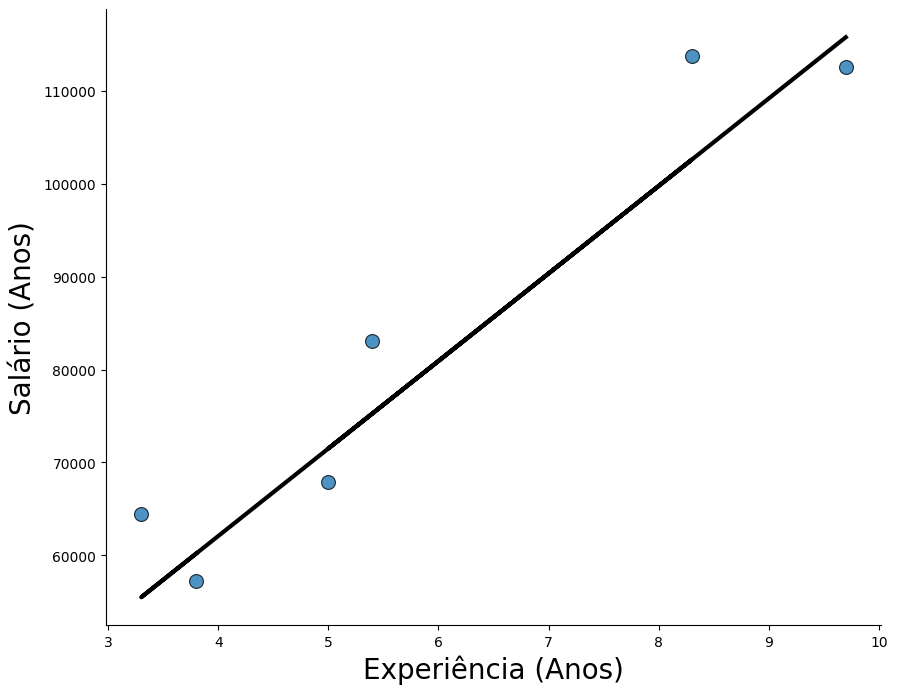

In [9]:
# Plot outputs
f, ax = plt.subplots(nrows=1 , ncols=1, figsize = (10,8))

sns.scatterplot(data = df_traning, x= 'X_test' , y= 'y_test',  s=100, alpha = 0.8 ,edgecolor = 'k' ,ax = ax )
ax.plot(X_test, y_pred, color="k", linewidth=3)

ax.set_ylabel('Salário (Anos)' , fontsize = 20)
ax.set_xlabel('Experiência (Anos)' , fontsize = 20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

